In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [7]:
cor = pd.read_csv('corona.csv')
cor.head()

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200330,AK,114.0,3540.0,NaN,7.0,3.0,3654,01a1c96fd2ed214d8747ab778c2fec7203c8cd2f,2020-03-30T20:00:00Z,3654,2,1.0,1.0,308.0,12.0,320.0
1,20200330,AL,859.0,5694.0,NaN,NaN,6.0,6553,1ced1dbd9879f8bbc4b1f7b7876b82611895d58e,2020-03-30T20:00:00Z,6553,1,2.0,0.0,1510.0,53.0,1563.0
2,20200330,AR,473.0,5262.0,NaN,62.0,7.0,5735,7199b3f9984cc54342a3d0f5926bff36ef440b6c,2020-03-30T20:00:00Z,5735,5,1.0,14.0,2235.0,47.0,2282.0
3,20200330,AS,NaN,NaN,NaN,NaN,0.0,0,955da7e53291581ad33f46d87bad7e4724848fea,2020-03-30T20:00:00Z,0,60,0.0,0.0,0.0,0.0,0.0
4,20200330,AZ,1157.0,15602.0,NaN,78.0,20.0,16759,2f64421fc130d03c93a0fa1b89e44c0324ac15a3,2020-03-30T20:00:00Z,16759,4,3.0,0.0,2649.0,238.0,2887.0


In [8]:
def date(i):
    return i.split('T')[0]

In [10]:
cor['day'] = cor['dateChecked'].apply(date)
cor.head()

,date,state,positive,negative,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,day
0,20200330,AK,114.0,3540.0,NaN,7.0,3.0,3654,01a1c96fd2ed214d8747ab778c2fec7203c8cd2f,2020-03-30T20:00:00Z,3654,2,1.0,1.0,308.0,12.0,320.0,2020-03-30
1,20200330,AL,859.0,5694.0,NaN,NaN,6.0,6553,1ced1dbd9879f8bbc4b1f7b7876b82611895d58e,2020-03-30T20:00:00Z,6553,1,2.0,0.0,1510.0,53.0,1563.0,2020-03-30
2,20200330,AR,473.0,5262.0,NaN,62.0,7.0,5735,7199b3f9984cc54342a3d0f5926bff36ef440b6c,2020-03-30T20:00:00Z,5735,5,1.0,14.0,2235.0,47.0,2282.0,2020-03-30
3,20200330,AS,NaN,NaN,NaN,NaN,0.0,0,955da7e53291581ad33f46d87bad7e4724848fea,2020-03-30T20:00:00Z,0,60,0.0,0.0,0.0,0.0,0.0,2020-03-30
4,20200330,AZ,1157.0,15602.0,NaN,78.0,20.0,16759,2f64421fc130d03c93a0fa1b89e44c0324ac15a3,2020-03-30T20:00:00Z,16759,4,3.0,0.0,2649.0,238.0,2887.0,2020-03-30


In [11]:
corona = cor[['state', 'positive', 'negative', 'hospitalized', 'death', 'total', 'day']]
corona.head()

,state,positive,negative,hospitalized,death,total,day
0,AK,114.0,3540.0,7.0,3.0,3654,2020-03-30
1,AL,859.0,5694.0,NaN,6.0,6553,2020-03-30
2,AR,473.0,5262.0,62.0,7.0,5735,2020-03-30
3,AS,NaN,NaN,NaN,0.0,0,2020-03-30
4,AZ,1157.0,15602.0,78.0,20.0,16759,2020-03-30


In [25]:
top10 = list(corona[corona['day'] == '2020-03-30'].sort_values('positive', ascending=False).iloc[:10]['state'].values)

In [26]:
top10_states = corona[corona['state'].isin(top10)]

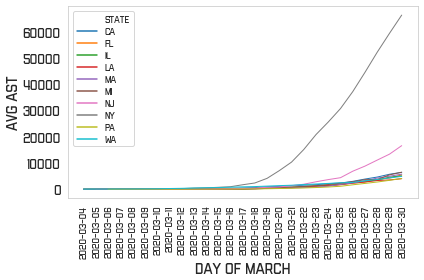

In [28]:
sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
ax = sns.lineplot(x="day", y="positive", hue="state", data=top10_states, lw=1)
#ax.lines[0].set_markersize(10)
#ax.lines[1].set_markersize(10)
#ax.lines[2].set_markersize(10)
#plt.setp(ax.get_legend().get_texts(), fontproperties=prop) # for legend text
#plt.setp(ax.get_legend().get_title(), fontproperties=prop)
prop = fm.FontProperties(fname='Liberator-Light.ttf')
plt.xticks(fontproperties=prop, size=10, rotation=90);
plt.yticks(fontproperties=prop, size=14);
plt.xlabel('Day of March', fontproperties=prop, size=16);
plt.ylabel('Avg AST', fontproperties=prop, size=16);
#ax.set_title('assists', fontproperties=prop, size=24);
plt.setp(ax.get_legend().get_texts(), fontproperties=prop) # for legend text
plt.setp(ax.get_legend().get_title(), fontproperties=prop)

plt.tight_layout()
#plt.savefig("shaqpt.png")

In [34]:
maxed = corona[corona['day'] == '2020-03-30']

In [56]:
import plotly.graph_objects as go

# Load data frame and tidy it.
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

fig = go.Figure(data=go.Choropleth(
    locations=maxed['state'], # Spatial coordinates
    z = maxed['positive'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'greys',
    colorbar_title = "Cases",
))

fig.update_layout(
    title='Positive Test Results as of March 30,2020',
    geo_scope='usa',
    font=dict(
        family='Liberator-Light.ttf',
        size=16,
    )
)
plt.tight_layout()
fig.show()

<Figure size 432x288 with 0 Axes>

In [57]:
fig = go.Figure(data=go.Choropleth(
    locations=maxed['state'], # Spatial coordinates
    z = maxed['death'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'reds',
    colorbar_title = "Cases",
))

fig.update_layout(
    title_text = 'Death as of March 30,2020',
    geo_scope='usa', # limite map scope to USA
)
plt.tight_layout()
fig.show()

<Figure size 432x288 with 0 Axes>

In [58]:
fig = go.Figure(data=go.Choropleth(
    locations=maxed['state'], # Spatial coordinates
    z = maxed['negative'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'blues',
    colorbar_title = "Cases",
))

fig.update_layout(
    title_text = 'Negative Test Results as of March 30,2020',
    geo_scope='usa', # limite map scope to USA
)
plt.tight_layout()
fig.show()

<Figure size 432x288 with 0 Axes>